In [1]:
import numpy as np

data = np.random.randint(0, 100, size=1000)

(array([ 88.,  84., 102., 100., 100., 114.,  94., 108.,  98., 112.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

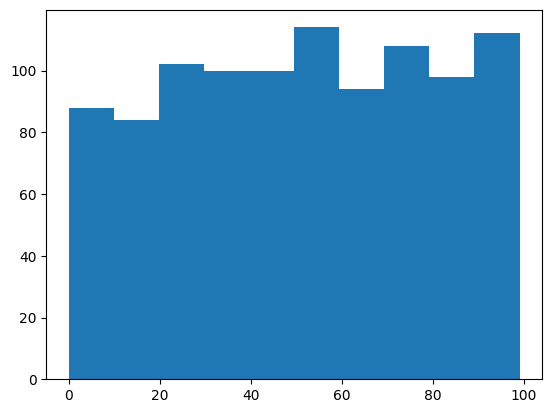

In [2]:
import matplotlib.pyplot as plt

plt.hist(data)

In [3]:
from river import preprocessing

# convert the data to required format
data_stream = [{"x": float(x)} for x in list(data)]

# initialize list for scaled values
data_scaled = []

# initialize scaler
my_scaler = preprocessing.MinMaxScaler()

# streaming
for observation in data_stream:
    # learn (update)
    my_scaler.learn_one(observation)

    # scale the observation
    scaled_obs = my_scaler.transform_one(observation)

    # store the scaled result
    data_scaled.append(scaled_obs["x"])

(array([ 91.,  83., 100., 100.,  92., 112.,  98., 102., 101., 121.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

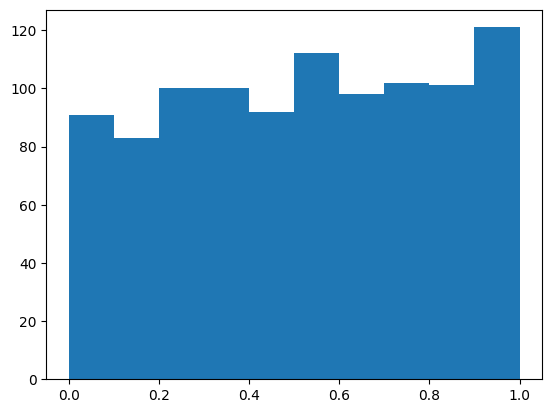

In [4]:
import matplotlib.pyplot as plt

plt.hist(data_scaled)

In [5]:
import numpy as np

data = np.random.normal(12, 15, size=1000)

(array([ 14.,  37., 123., 267., 280., 179.,  81.,  15.,   3.,   1.]),
 array([-35.27054877, -23.98552189, -12.700495  ,  -1.41546812,
          9.86955876,  21.15458564,  32.43961253,  43.72463941,
         55.00966629,  66.29469318,  77.57972006]),
 <BarContainer object of 10 artists>)

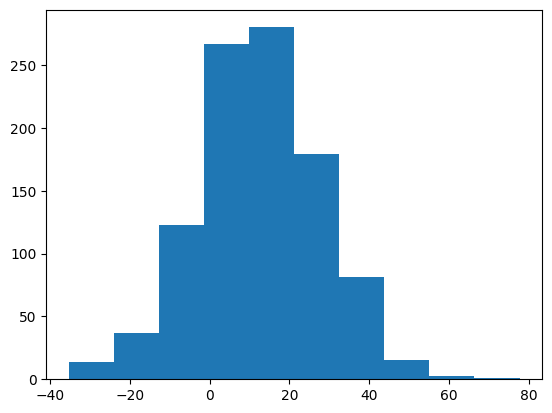

In [6]:
import matplotlib.pyplot as plt

plt.hist(data)

In [7]:
from river import preprocessing

# convert the data to required format
data_stream = [{"x": float(x)} for x in list(data)]

# initialize list for scaled values
data_scaled = []

# initialize scaler
my_scaler = preprocessing.StandardScaler()

# streaming
for observation in data_stream:
    # learn (update)
    my_scaler.learn_one(observation)

    # scale the observation
    scaled_obs = my_scaler.transform_one(observation)

    # store the scaled result
    data_scaled.append(scaled_obs["x"])

(array([ 15.,  42., 116., 251., 281., 176.,  88.,  26.,   4.,   1.]),
 array([-3.0499177 , -2.33591684, -1.62191597, -0.90791511, -0.19391425,
         0.52008661,  1.23408748,  1.94808834,  2.6620892 ,  3.37609006,
         4.09009093]),
 <BarContainer object of 10 artists>)

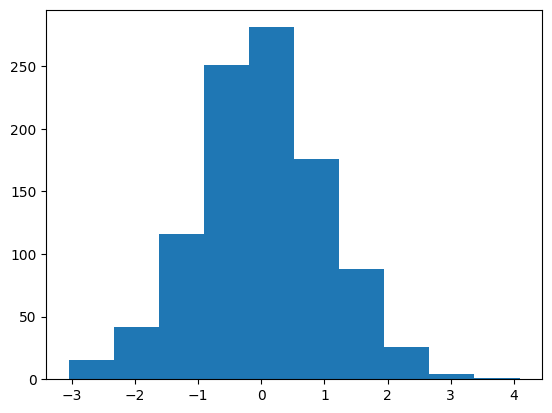

In [8]:
plt.hist(data_scaled)

In [9]:
import numpy as np
import pandas as pd

X1 = np.random.normal(5, 1, size=100)
X2 = np.random.normal(5, 0.5, size=100)
data = pd.DataFrame({"X1": X1, "X2": X1 + X2})
data.head()

,X1,X2
0,4.789586,9.212414
1,3.620121,9.215928
2,5.627651,10.866531
3,2.597274,7.153477
4,5.155175,9.151593


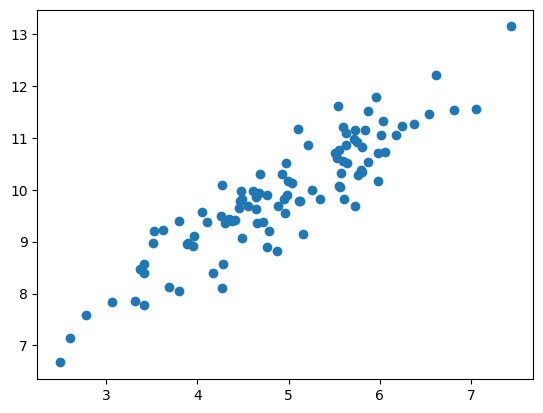

In [10]:
import matplotlib.pyplot as plt

plt.scatter(data["X1"], data["X2"])

In [11]:
from sklearn.decomposition import PCA

my_pca = PCA()
transformed_data = my_pca.fit_transform(data)
transformed_data = pd.DataFrame(transformed_data, columns=["PC1", "PC2"])
transformed_data.head()

,PC1,PC2
0,-0.605407,0.343494
1,-1.367577,-0.543500
2,1.194019,-0.104303
3,-3.596753,0.031560
4,-0.412323,0.659837


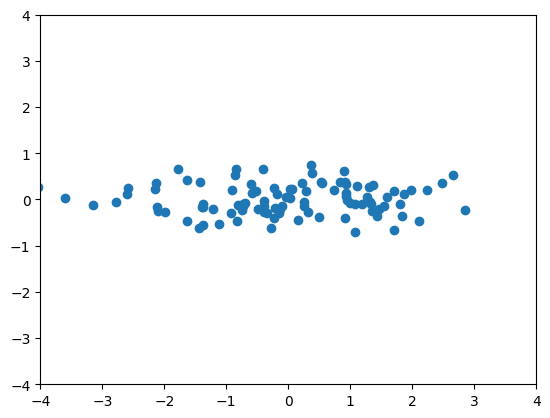

In [12]:
plt.scatter(transformed_data["PC1"], transformed_data["PC2"])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

In [13]:
from sklearn.decomposition import IncrementalPCA

my_incremental_pca = IncrementalPCA(batch_size=10)
transformed_data_2 = my_incremental_pca.fit_transform(data)
transformed_data_2 = pd.DataFrame(transformed_data_2, columns=["PC1", "PC2"])
transformed_data_2.head()

,PC1,PC2
0,-0.605407,0.343494
1,-1.367577,-0.543500
2,1.194019,-0.104303
3,-3.596753,0.031560
4,-0.412323,0.659837


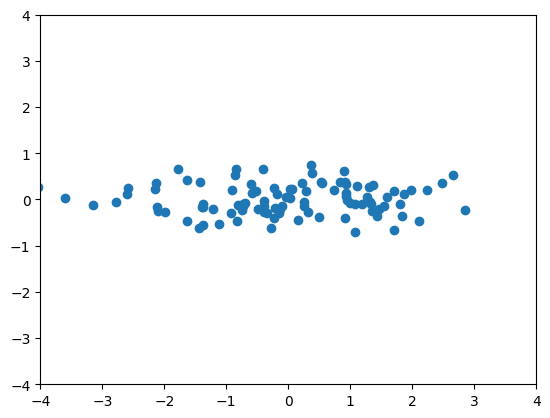

In [14]:
plt.scatter(transformed_data_2["PC1"], transformed_data_2["PC2"])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()